In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas import get_dummies
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("train.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
data.shape

(550068, 12)

In [4]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
data.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [7]:
data["Purchase"] = np.where(data["Purchase"] > 10000 , 1,0)
data["Purchase"].value_counts()

,count
Purchase,
0,360618
1,189450


In [8]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,0


In [9]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [10]:
data["Product_Category_2"].fillna(data["Product_Category_2"].mode()[0],inplace=True)
data.drop(["Product_Category_3"],axis=1,inplace=True)

<ipython-input-10-66eaf45d90ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Product_Category_2"].fillna(data["Product_Category_2"].mode()[0],inplace=True)


In [11]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
Le = LabelEncoder()
data['Gender'] = Le.fit_transform(data["Gender"])
print(data['Gender'])


0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64


In [14]:
en = pd.get_dummies(data["City_Category"],prefix="City_Category", drop_first=False)
data = pd.concat([data,en],axis=1)
data.drop(['City_Category'],axis=1)
print(data)

        User_ID Product_ID  Gender    Age  Occupation City_Category  \
0       1000001  P00069042       0   0-17          10             A   
1       1000001  P00248942       0   0-17          10             A   
2       1000001  P00087842       0   0-17          10             A   
3       1000001  P00085442       0   0-17          10             A   
4       1000002  P00285442       1    55+          16             C   
...         ...        ...     ...    ...         ...           ...   
550063  1006033  P00372445       1  51-55          13             B   
550064  1006035  P00375436       0  26-35           1             C   
550065  1006036  P00375436       0  26-35          15             B   
550066  1006038  P00375436       0    55+           1             C   
550067  1006039  P00371644       0  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1

In [15]:
data.drop(['City_Category'],axis=1,inplace = True)
print(data)

        User_ID Product_ID  Gender    Age  Occupation  \
0       1000001  P00069042       0   0-17          10   
1       1000001  P00248942       0   0-17          10   
2       1000001  P00087842       0   0-17          10   
3       1000001  P00085442       0   0-17          10   
4       1000002  P00285442       1    55+          16   
...         ...        ...     ...    ...         ...   
550063  1006033  P00372445       1  51-55          13   
550064  1006035  P00375436       0  26-35           1   
550065  1006036  P00375436       0  26-35          15   
550066  1006038  P00375436       0    55+           1   
550067  1006039  P00371644       0  46-50           0   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                      

In [16]:
data['City_Category_A'] = data['City_Category_A'].astype(int)
data['City_Category_B'] = data['City_Category_B'].astype(int)
data['City_Category_C'] = data['City_Category_C'].astype(int)

In [17]:
data

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0-17,10,2,0,3,8.0,0,1,0,0
1,1000001,P00248942,0,0-17,10,2,0,1,6.0,1,1,0,0
2,1000001,P00087842,0,0-17,10,2,0,12,8.0,0,1,0,0
3,1000001,P00085442,0,0-17,10,2,0,12,14.0,0,1,0,0
4,1000002,P00285442,1,55+,16,4+,0,8,8.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,1,1,20,8.0,0,0,1,0
550064,1006035,P00375436,0,26-35,1,3,0,20,8.0,0,0,0,1
550065,1006036,P00375436,0,26-35,15,4+,1,20,8.0,0,0,1,0
550066,1006038,P00375436,0,55+,1,2,0,20,8.0,0,0,0,1


In [18]:
age_map = {'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}
data["Age"] = data["Age"].map(age_map)
print(data["Age"])


0         1
1         1
2         1
3         1
4         7
         ..
550063    6
550064    3
550065    3
550066    7
550067    5
Name: Age, Length: 550068, dtype: int64


In [19]:
data['Stay_In_Current_City_Years'] = data["Stay_In_Current_City_Years"].replace('4+','4').astype(int)

In [20]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,1,10,2,0,3,8.0,0,1,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,1,1,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,0,1,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,0,1,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,0,0,0,1


In [21]:
for col in data.columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())


Unique values in User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
Unique values in Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Unique values in Gender:
[0 1]
Unique values in Age:
[1 7 3 5 6 4 2]
Unique values in Occupation:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Unique values in Stay_In_Current_City_Years:
[2 4 3 1 0]
Unique values in Marital_Status:
[0 1]
Unique values in Product_Category_1:
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Unique values in Product_Category_2:
[ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Unique values in Purchase:
[0 1]
Unique values in City_Category_A:
[1 0]
Unique values in City_Category_B:
[0 1]
Unique values in City_Category_C:
[0 1]


In [22]:
data = data.drop(columns = ["User_ID","Product_ID"])

In [23]:
data.dtypes

,0
Gender,int64
Age,int64
Occupation,int64
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64
Purchase,int64
City_Category_A,int64
City_Category_B,int64


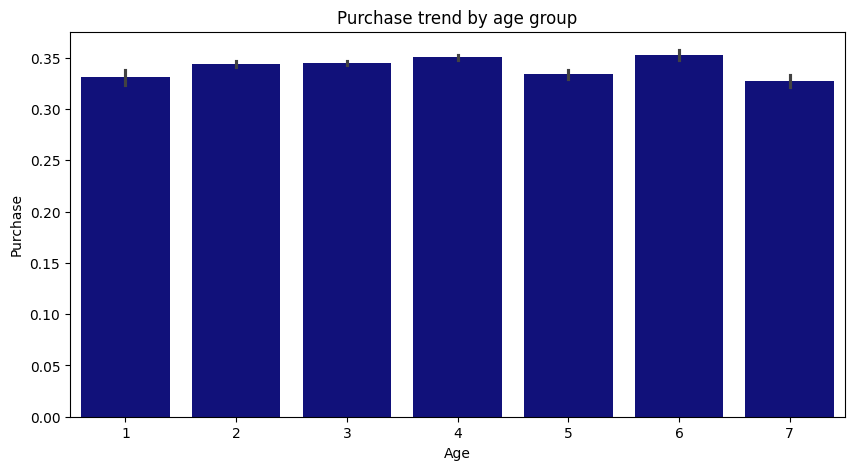

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Age',y='Purchase',color='Darkblue')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Purchase trend by age group')
plt.show()

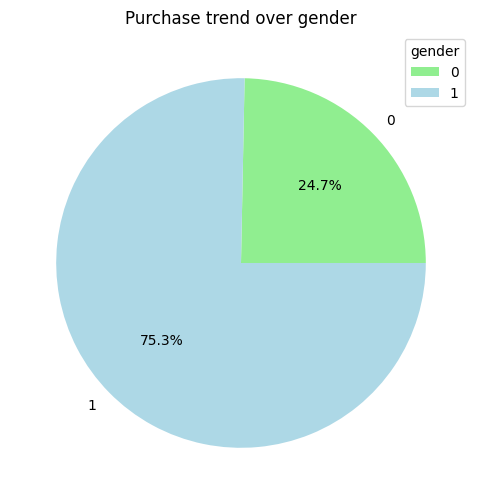

In [31]:
gender_sales = data.groupby('Gender')['Purchase'].count().reset_index()
plt.figure(figsize=(7,6))
plt.pie(gender_sales['Purchase'],labels=gender_sales['Gender'],autopct='%1.1f%%',colors=['lightgreen','lightblue'])
plt.title('Purchase trend over gender')
plt.legend(title='gender')
plt.show()

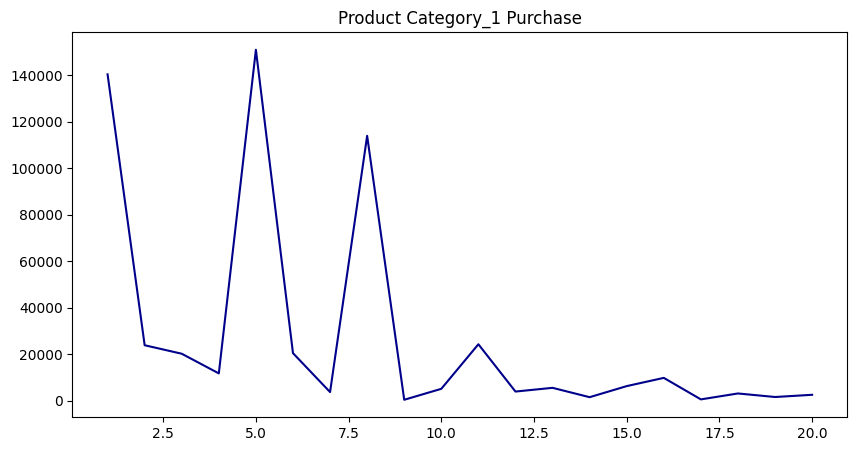

In [49]:
product_sales = data.groupby('Product_Category_1')['Purchase'].count().reset_index()
plt.figure(figsize=(10,5))
plt.plot(product_sales['Product_Category_1'],product_sales['Purchase'],color='Darkblue')
plt.xlabel=('Product_Category_1')
plt.ylabel=('Purchase')
plt.title('Product Category_1 Purchase')
plt.show()

In [50]:
x = data.drop(columns = ['Purchase'],axis=1)
y = data['Purchase']

In [51]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_predict = model.predict(x_test)

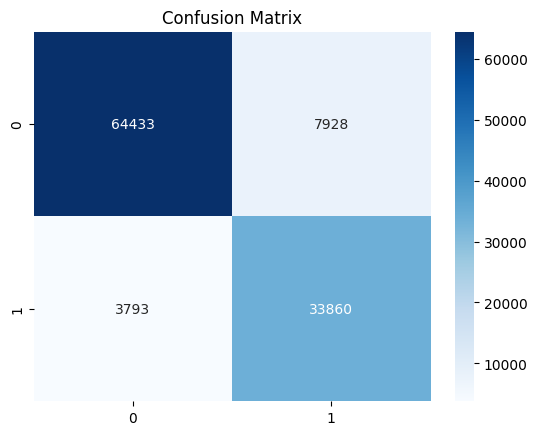

In [57]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel=("Predicted")
plt.ylabel=("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     72361
           1       0.81      0.90      0.85     37653

    accuracy                           0.89    110014
   macro avg       0.88      0.89      0.88    110014
weighted avg       0.90      0.89      0.89    110014

